In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

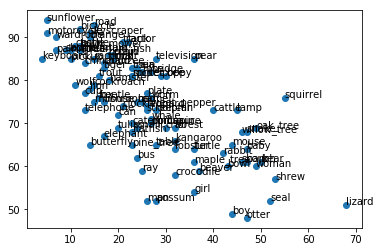

In [2]:
import csv

classes = []
params = np.zeros((100, 3))

with open('cifar100_output_df.csv', 'r') as f:
    reader = csv.DictReader(f)
    for i, line in enumerate(reader):
        classes.append(line['Predicted_Class_k'])
        params[i, 0] = int(line['R_k'])
        params[i, 1] = int(line['N_k']) - int(line['R_k'])
        params[i, 2] = float(line['Conf_k'])
        
plt.scatter(params[:,1], params[:,0])
for i, _class in enumerate(classes):
    plt.annotate(_class, (params[i,1], params[i,0]))

In [3]:
# Sort by accuracy
accuracy = params[:,0] / (params[:,0] + params[:,1])
sort_idx = np.argsort(accuracy)

params = params[sort_idx,:]
classes = [classes[i] for i in sort_idx]

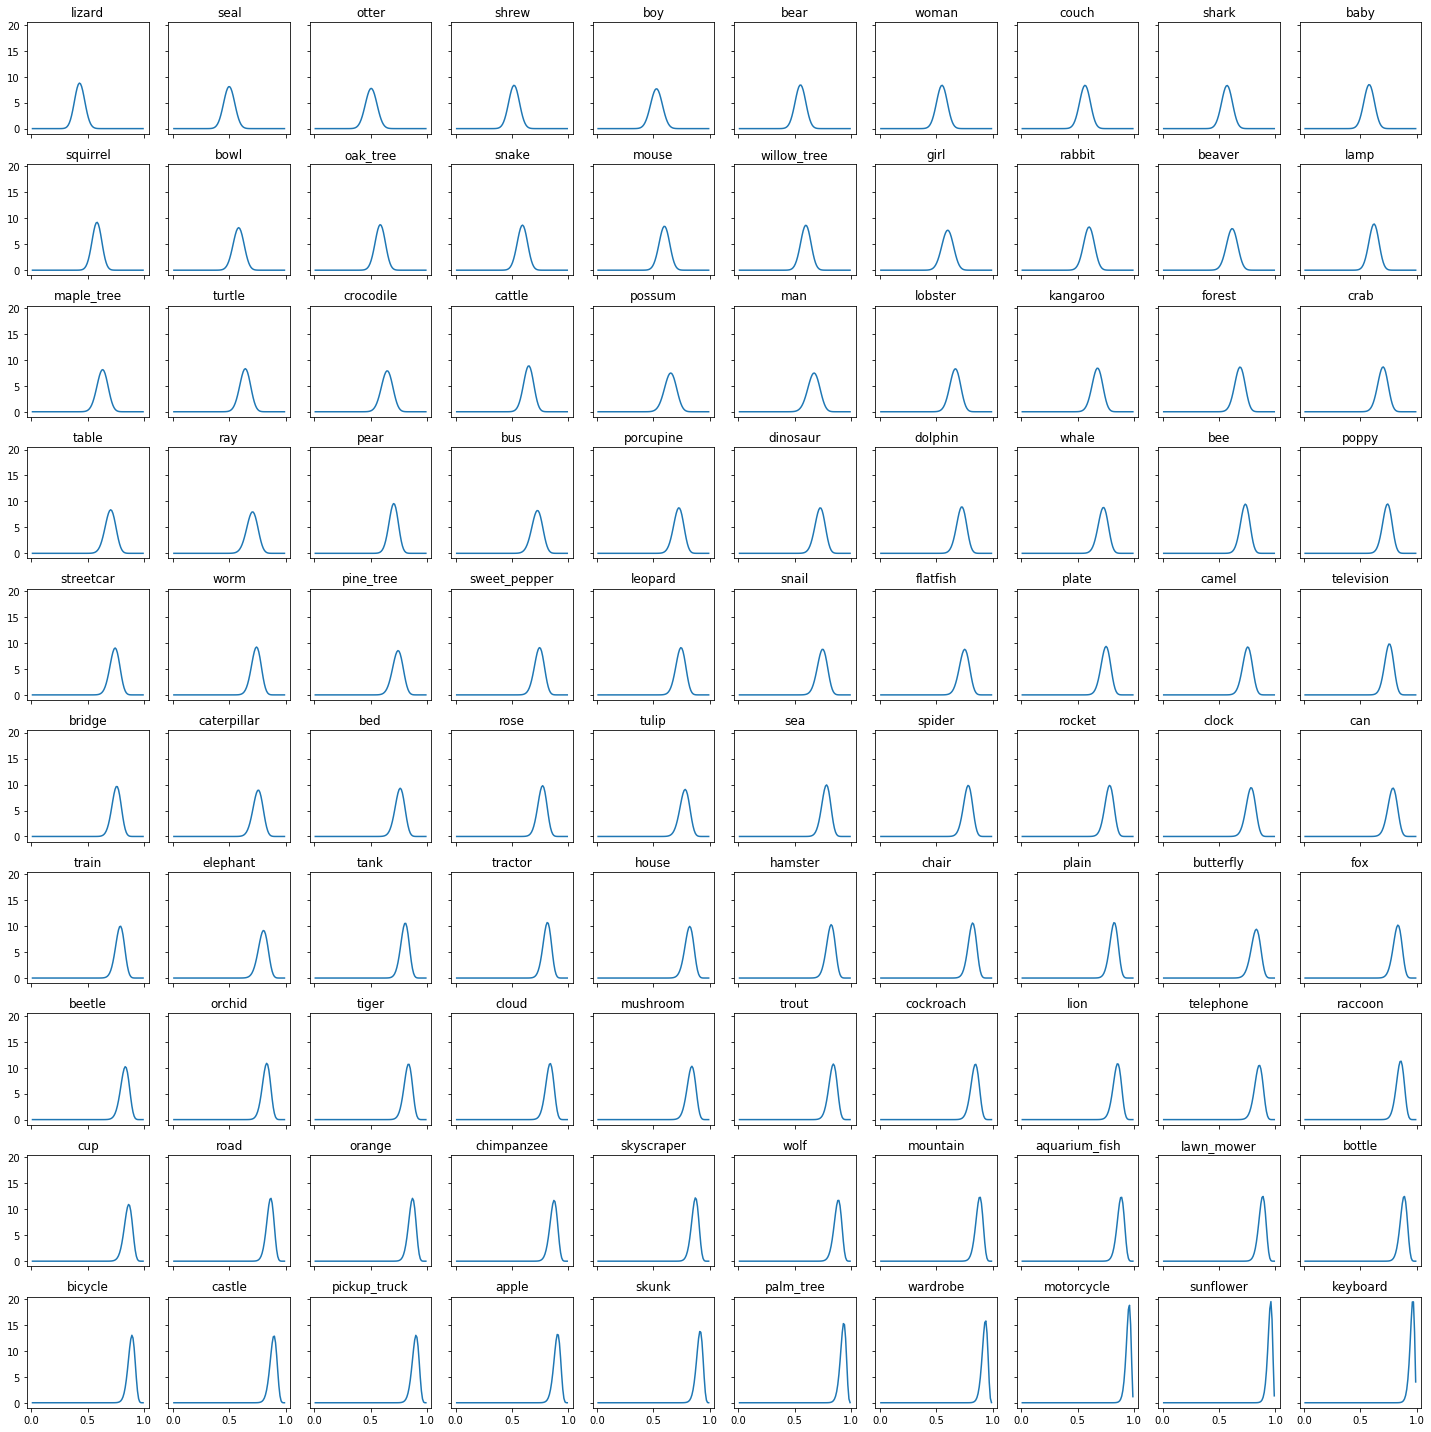

In [4]:
x = np.linspace(0.01, 0.99, 100)

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(x, y)
    ax.set_title(predicted_class)

fig.tight_layout()

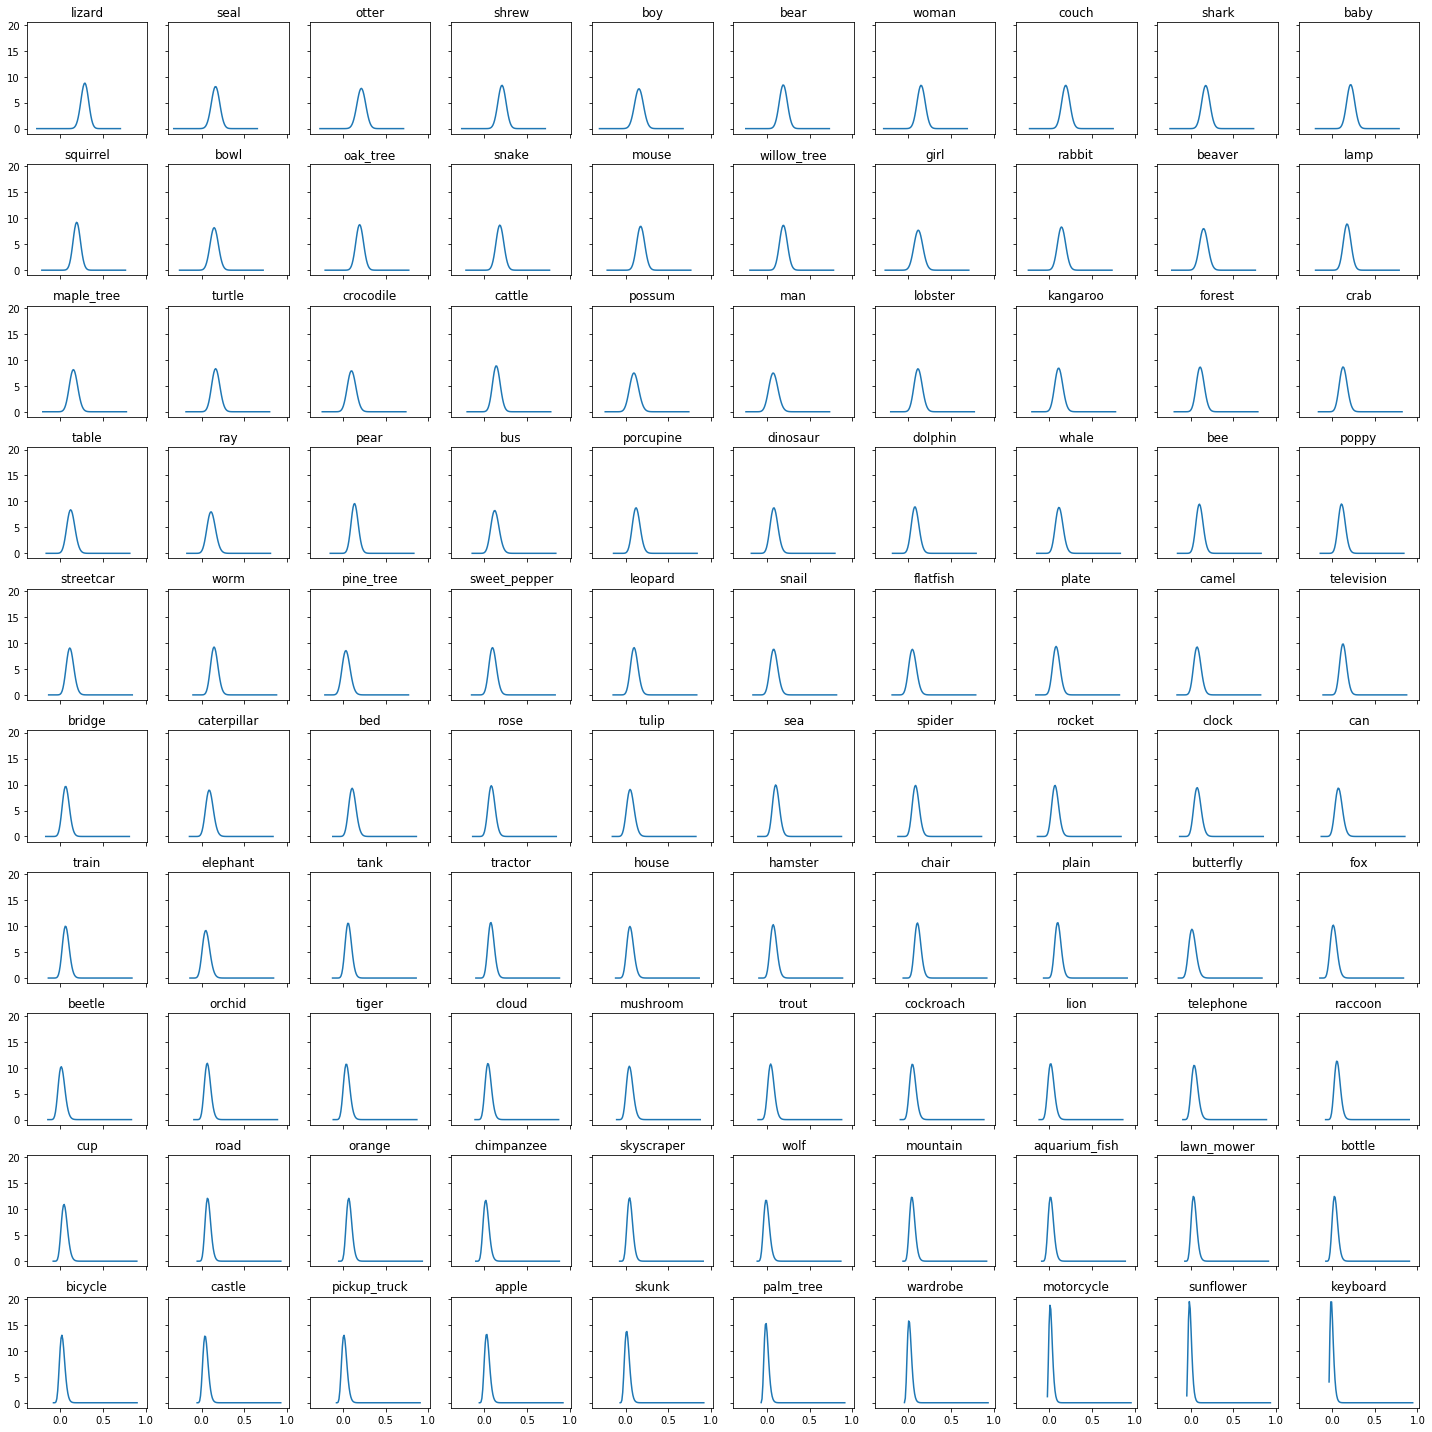

In [5]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(_params[2] - x, y)
    ax.set_title(predicted_class)
    
fig.tight_layout()

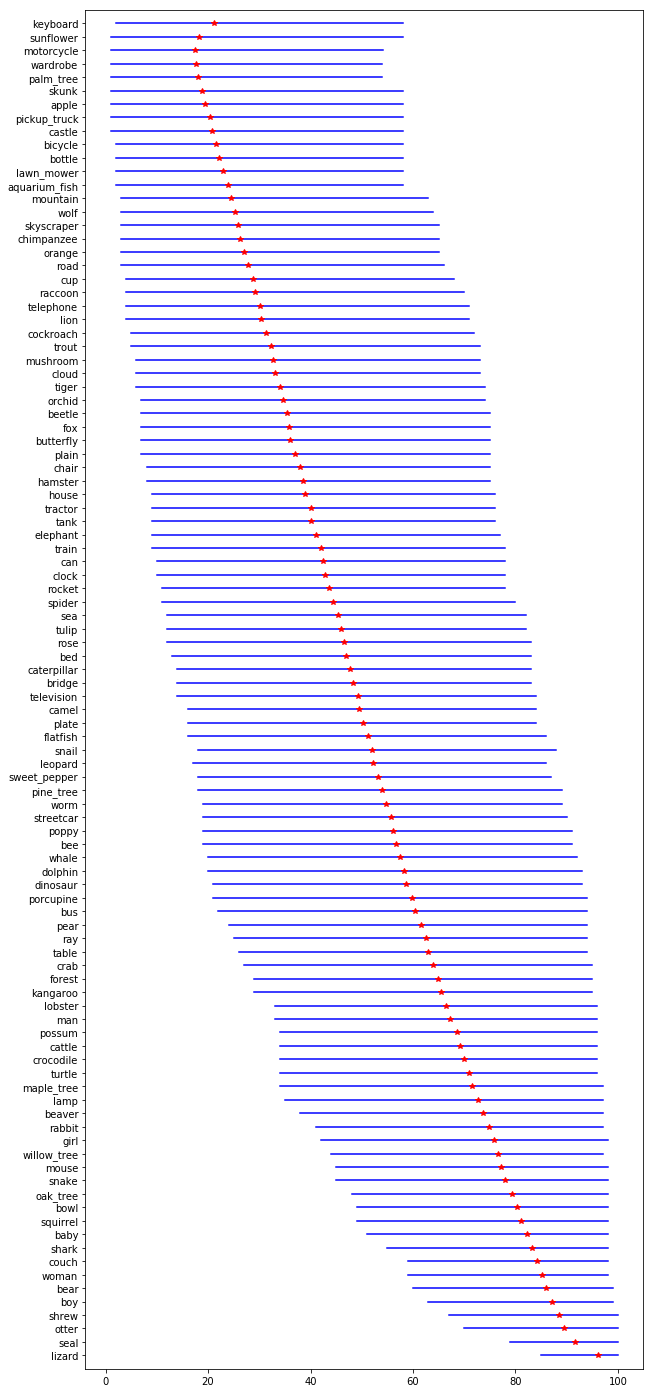

In [8]:
plt.figure(figsize=(10, 25))

n_samples = 10_000
monte_carlo_samples = np.zeros((100, n_samples))

# Accuracy ranking
# for i in range(100):
#    monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples)

# Bias ranking
for i in range(100):
    monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples) - params[i, 2]

    
ranks = 100 - np.argsort(monte_carlo_samples, axis=0)
intervals = np.quantile(ranks, (0.05, 0.95), axis=1)
avg_ranks = np.mean(ranks, axis=1)

for i in range(100):
    plt.plot([intervals[0, i], intervals[1, i]], [i, i], c='blue')
    plt.plot(avg_ranks[i], i, marker='*', c='red')


plt.ylim(-1, 100)

plt.yticks(ticks = list(range(100)), labels = classes);

In [10]:
params[:,0]/(params[:,0] + params[:,1]) - params[:,2]

array([-2.85624370e-01, -1.63175000e-01, -2.15487368e-01, -2.07911818e-01,
       -1.57418280e-01, -1.93221622e-01, -1.52557798e-01, -1.91566667e-01,
       -1.76479439e-01, -2.18770270e-01, -1.93456489e-01, -1.48581553e-01,
       -1.96827119e-01, -1.84317391e-01, -1.78410092e-01, -1.94974561e-01,
       -1.20864444e-01, -1.42800000e-01, -1.52498958e-01, -1.77601695e-01,
       -1.55746392e-01, -1.66847000e-01, -1.03244444e-01, -1.43454867e-01,
       -1.01832500e-01, -7.85512821e-02, -1.18725000e-01, -1.10595918e-01,
       -1.13097030e-01, -1.32992929e-01, -1.25389247e-01, -1.14686905e-01,
       -1.38942975e-01, -1.27804651e-01, -1.27343299e-01, -8.63680412e-02,
       -8.38455446e-02, -1.16031633e-01, -1.04666667e-01, -1.15185455e-01,
       -1.15955556e-01, -1.50442718e-01, -3.97806818e-02, -1.01299000e-01,
       -1.04487000e-01, -8.49752688e-02, -5.45219780e-02, -8.25446602e-02,
       -7.88590000e-02, -1.31779646e-01, -6.67844037e-02, -9.43698925e-02,
       -1.13147475e-01, -